In [142]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

In [6]:
train_df = pd.read_csv('C:/Users/borak/Desktop/HousePrice/Data/train.csv')
test_df = pd.read_csv('C:/Users/borak/Desktop/HousePrice/Data/test.csv')

In [7]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
train_df.dtypes  [train_df.dtypes != 'object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

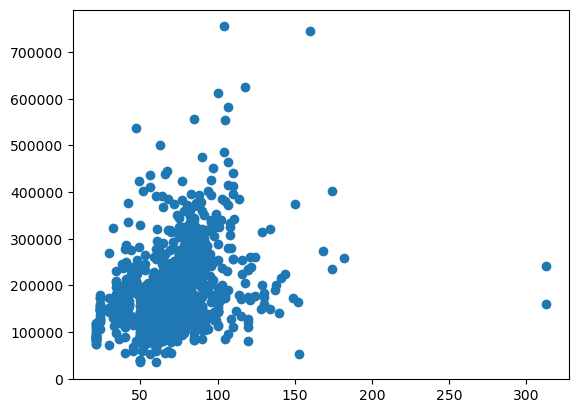

In [9]:
plt.scatter(x='LotFrontage',y ='SalePrice', data=train_df)

In [10]:
train_df.query('LotFrontage >300')
#drop 935 and 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


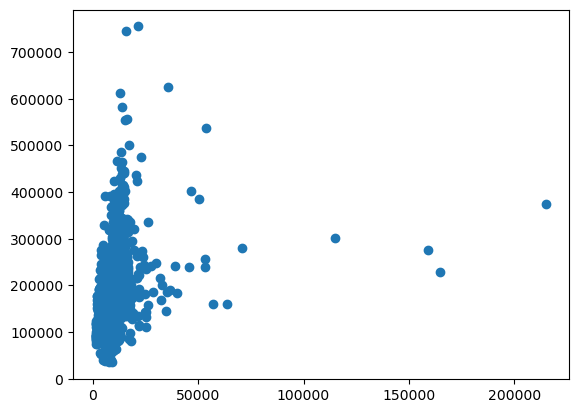

In [11]:
plt.scatter(x='LotArea',y ='SalePrice', data=train_df)

In [12]:
train_df.query('LotArea >55000')
#250,314,336,707
#maybe 1397

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000


In [13]:
stats.zscore(train_df['LotArea']).sort_values().tail(10)
# Z score = (PointX - Mean) / standard Deviation

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
Name: LotArea, dtype: float64

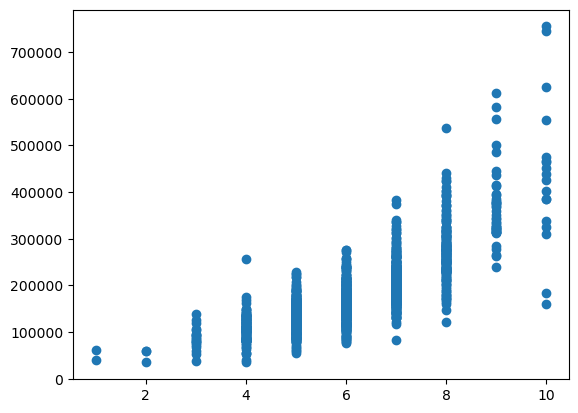

In [14]:
plt.scatter(x = 'OverallQual', y ='SalePrice',data = train_df)

In [15]:
train_df.query('OverallQual == 10')
#maybe 524

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


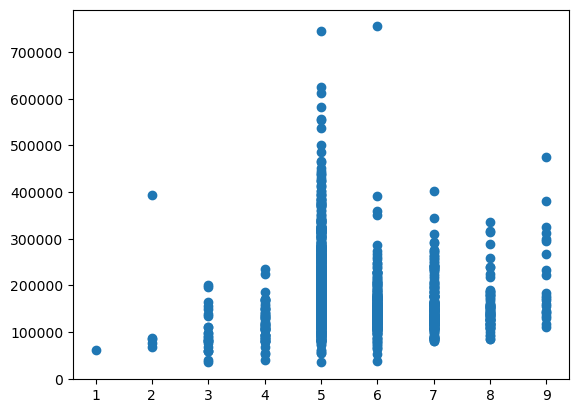

In [16]:
plt.scatter(x = 'OverallCond', y ='SalePrice',data = train_df)

In [17]:
train_df.query('OverallCond == 2')
#379

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
250,251,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432
398,399,30,RM,60.0,8967,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,67000
676,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000


In [18]:
train_df.query('OverallCond == 5 & SalePrice > 700000')
#1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [19]:
train_df.query('OverallCond == 6 & SalePrice > 700000')
#692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


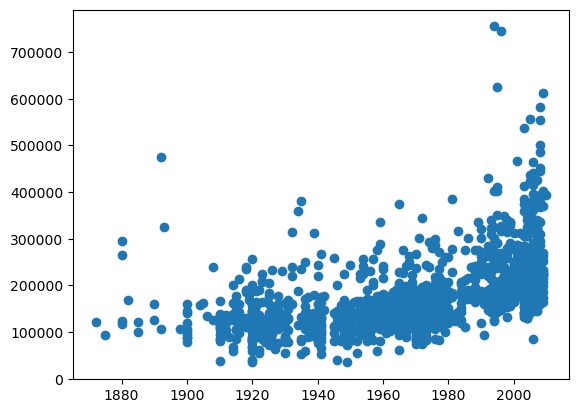

In [20]:
plt.scatter(x = 'YearBuilt', y ='SalePrice',data = train_df)

In [21]:
train_df.query('YearBuilt < 1900 & SalePrice > 400000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


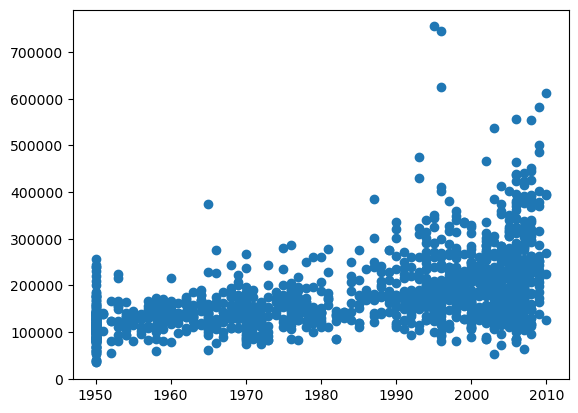

In [22]:
plt.scatter(x = 'YearRemodAdd', y ='SalePrice',data = train_df)

In [23]:
values = [598, 955, 935, 1299, 250, 314, 336, 707, 379, 1183, 692, 186, 441, 186, 524, 739, 598, 955, 636, 1062, 1191, 496, 198, 1338]

In [24]:
train_df = train_df[train_df.Id.isin(values) == False]

In [25]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head(20)

,0
PoolQC,1435
MiscFeature,1388
Alley,1350
Fence,1162
FireplaceQu,684
LotFrontage,255
GarageYrBlt,76
GarageCond,76
GarageType,76
GarageFinish,76


In [26]:
train_df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [27]:
train_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [28]:
train_df['Alley'] = train_df['Alley'].fillna('No')
test_df['Alley'] = test_df['Alley'].fillna('No')

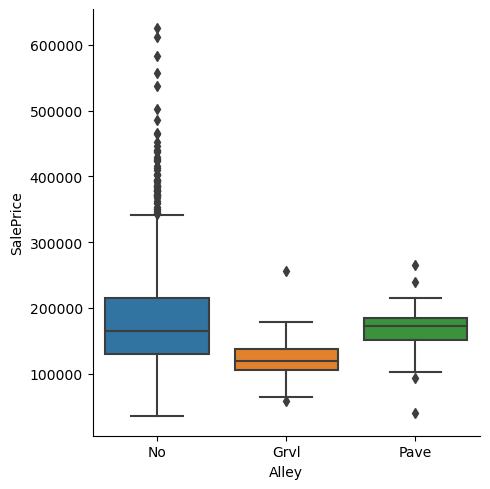

In [29]:
sns.catplot(data=train_df, x="Alley", y="SalePrice", kind="box")

In [30]:
train_df['Fence'].unique()


array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [31]:
train_df['Fence'] = train_df['Alley'].fillna('No')
test_df['Fence'] = test_df['Alley'].fillna('No')


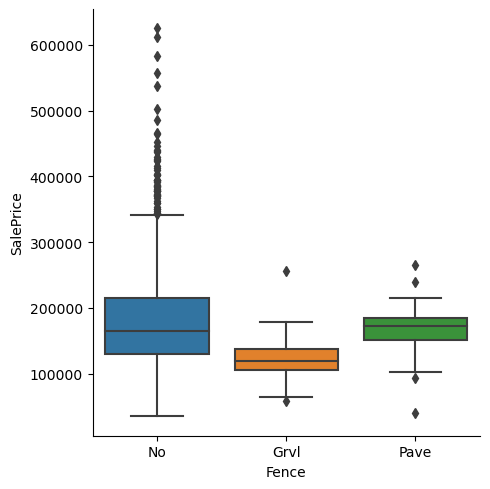

In [32]:
sns.catplot(data=train_df, x="Fence", y="SalePrice", kind="box")

In [33]:
train_df['MasVnrType'].unique()


array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [34]:
train_df['MasVnrType'].fillna('No', inplace=True)
test_df['MasVnrType'].fillna('No', inplace=True)

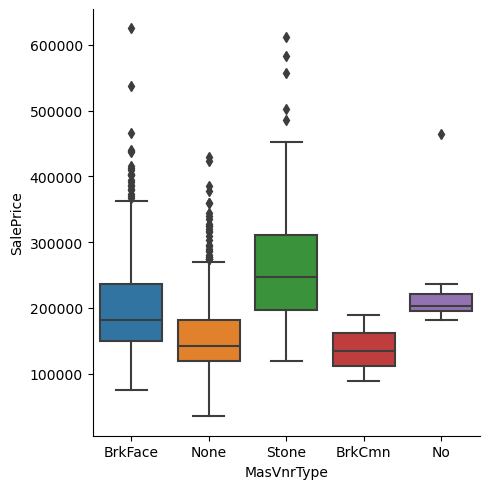

In [35]:
sns.catplot(data=train_df, x="MasVnrType", y="SalePrice", kind="box")


In [36]:
train_df['MasVnrArea'].fillna(0, inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)

In [37]:
train_df['FireplaceQu'].unique()


array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [38]:
train_df['FireplaceQu'] = train_df['FireplaceQu'].fillna('No')
test_df['FireplaceQu'] = test_df['FireplaceQu'].fillna('No')


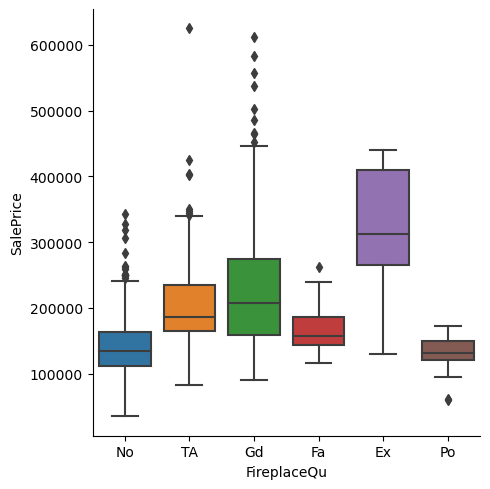

In [39]:
sns.catplot(data=train_df, x="FireplaceQu", y="SalePrice", kind="box")

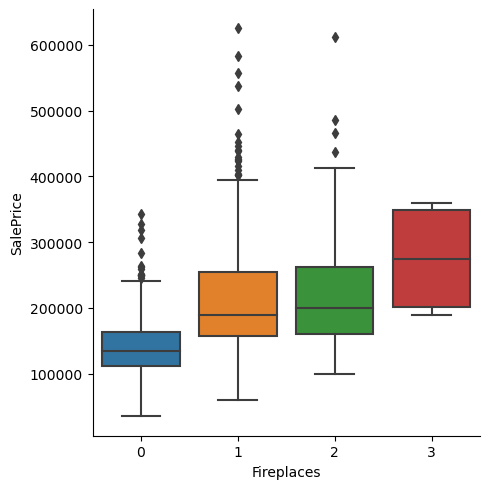

In [40]:
sns.catplot(data=train_df, x="Fireplaces", y="SalePrice", kind="box")

In [41]:
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(0).infer_objects()
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(0).infer_objects()


In [42]:
train_df['GarageYrBlt'].corr(train_df['YearBuilt'])

0.8289827595060575

In [43]:
train_df['GarageCond'].unique()


array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [44]:
train_df['GarageCond'] = train_df['GarageCond'].fillna('No')
test_df['GarageCond'] = test_df['GarageCond'].fillna('No')

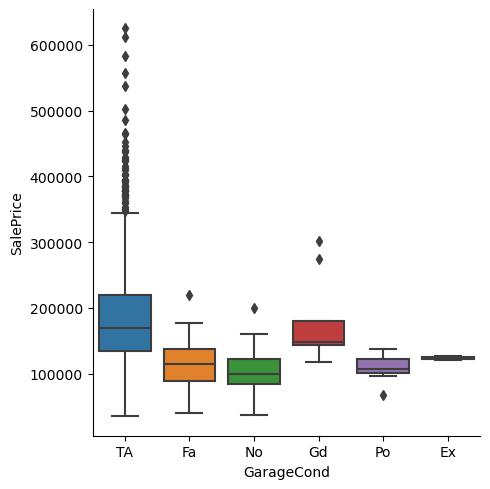

In [45]:
sns.catplot(data=train_df, x="GarageCond", y="SalePrice", kind="box")

In [46]:
train_df['GarageType'] = train_df['GarageType'].fillna('No')
test_df['GarageType'] = test_df['GarageType'].fillna('No')

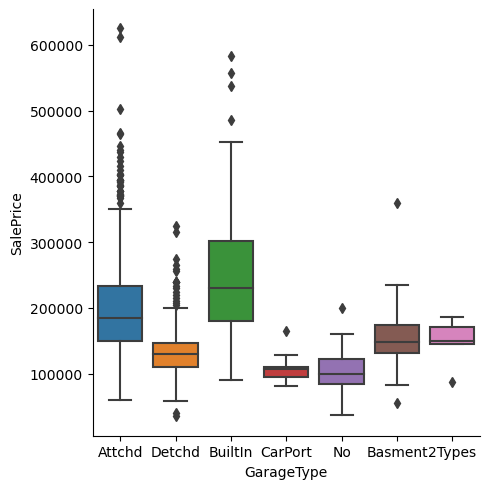

In [47]:
sns.catplot(data=train_df, x="GarageType", y="SalePrice", kind="box")

In [48]:
train_df['GarageFinish'] = train_df['GarageFinish'].fillna('No')
test_df['GarageFinish'] = test_df['GarageFinish'].fillna('No')


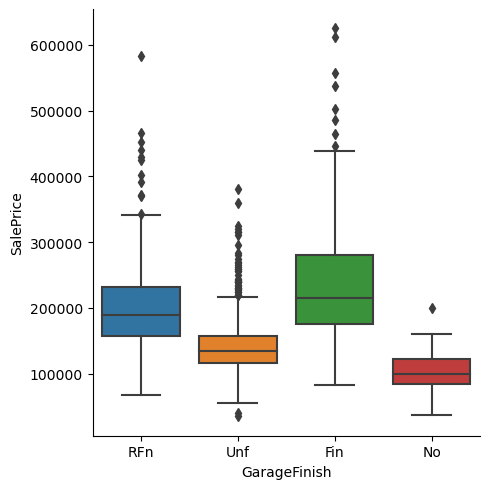

In [49]:
sns.catplot(data=train_df, x="GarageFinish", y="SalePrice", kind="box")

In [50]:
train_df['GarageQual'] = train_df['GarageFinish'].fillna('No')
test_df['GarageQual'] = test_df['GarageFinish'].fillna('No')


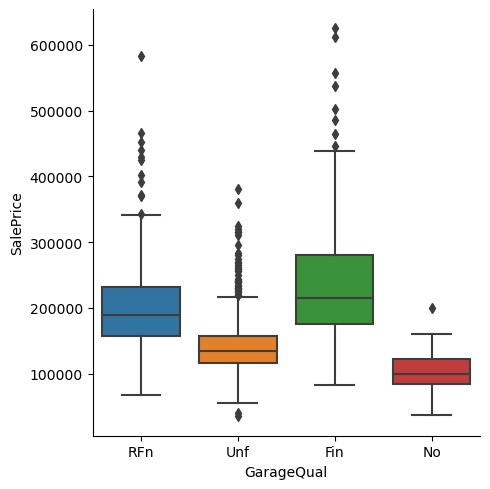

In [51]:
sns.catplot(data=train_df, x="GarageQual", y="SalePrice", kind="box")

In [52]:
train_df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [53]:
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].fillna('No')
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].fillna('No')

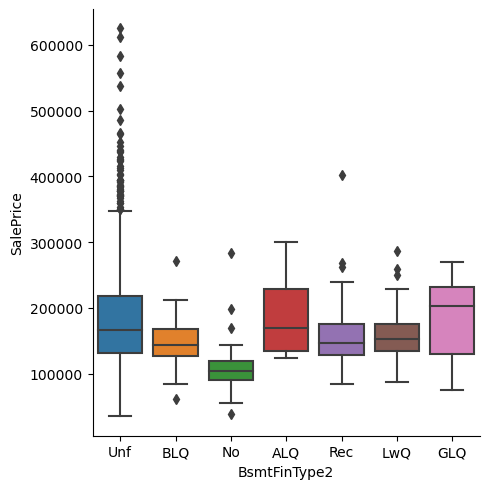

In [54]:
sns.catplot(data=train_df, x="BsmtFinType2", y="SalePrice", kind="box")

In [55]:
train_df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [56]:
train_df['BsmtExposure'] = train_df['BsmtExposure'].fillna('No')
test_df['BsmtExposure'] = test_df['BsmtExposure'].fillna('No')


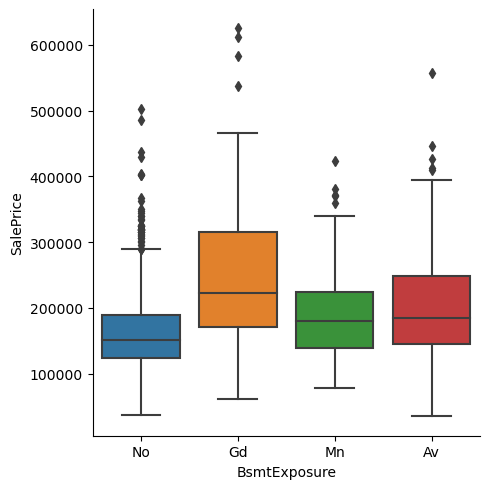

In [57]:
sns.catplot(data=train_df, x="BsmtExposure", y="SalePrice", kind="box")

In [58]:
train_df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [59]:
train_df['BsmtQual'] = train_df['BsmtQual'].fillna('No')
test_df['BsmtQual'] = test_df['BsmtQual'].fillna('No')


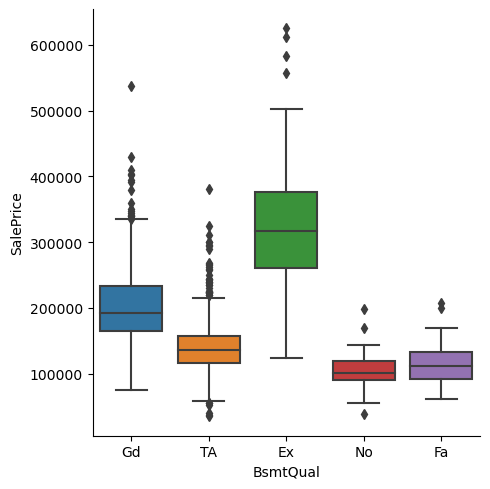

In [60]:
sns.catplot(data=train_df, x="BsmtQual", y="SalePrice", kind="box")

In [61]:
train_df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [62]:
train_df['BsmtCond'] = train_df['BsmtCond'].fillna('No')
test_df['BsmtCond'] = test_df['BsmtCond'].fillna('No')

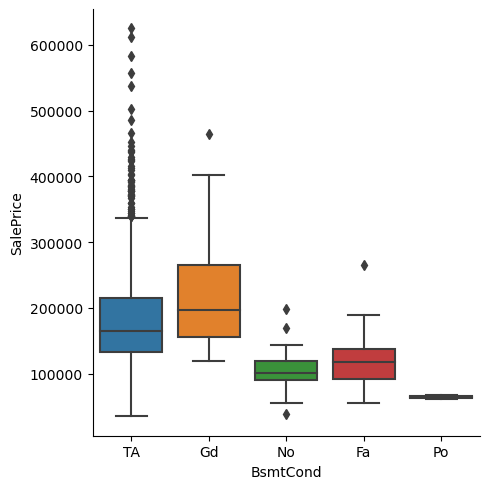

In [63]:
sns.catplot(data=train_df, x="BsmtCond", y="SalePrice", kind="box")


In [64]:
train_df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [65]:
train_df['BsmtFinType1'] = train_df['BsmtFinType1'].fillna('No')
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].fillna('No')

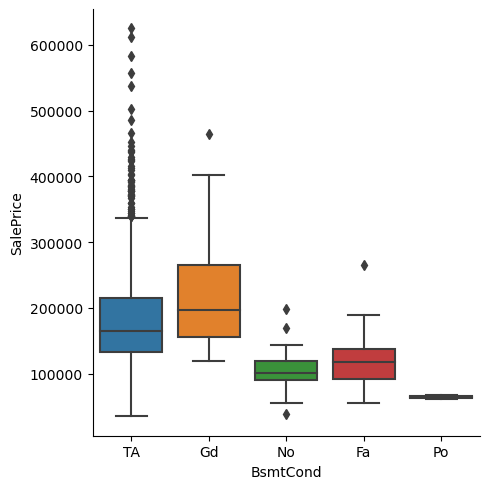

In [66]:
sns.catplot(data=train_df, x="BsmtCond", y="SalePrice", kind="box")

In [67]:
train_df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'No', 'LwQ'], dtype=object)

In [68]:
train_df['BsmtFinType1'] = train_df['BsmtFinType1'].fillna('No')
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].fillna('No')

In [69]:
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(0)
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(0)

In [70]:
train_df['Electrical'] = train_df['Electrical'].fillna('SBrkr')
test_df['Electrical'] = test_df['Electrical'].fillna('SBrkr')

In [71]:
train_df = train_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])
test_df = test_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])

In [72]:
#feature engineering

In [73]:
train_df['houseage'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['houseage'] = test_df['YrSold'] - test_df['YearBuilt']

In [74]:
train_df['houseremodelage'] = train_df['YrSold'] - train_df['YearRemodAdd']
test_df['houseremodelage'] = test_df['YrSold'] - test_df['YearRemodAdd']

In [75]:
train_df['totalsf'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['BsmtFinSF1'] + train_df['BsmtFinSF2']
test_df['totalsf'] = test_df['1stFlrSF'] + test_df['2ndFlrSF'] + test_df['BsmtFinSF1'] + test_df['BsmtFinSF2']

In [76]:
train_df['totalarea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
test_df['totalarea'] = test_df['GrLivArea'] + test_df['TotalBsmtSF']

In [77]:
train_df['totalbaths'] = train_df['BsmtFullBath'] + train_df['FullBath'] + 0.5 * (train_df['BsmtHalfBath'] + train_df['HalfBath']) 
test_df['totalbaths'] = test_df['BsmtFullBath'] + test_df['FullBath'] + 0.5 * (test_df['BsmtHalfBath'] + test_df['HalfBath']) 

In [78]:
train_df['totalporchsf'] = train_df['OpenPorchSF'] + train_df['3SsnPorch'] + train_df['EnclosedPorch'] + train_df['ScreenPorch'] + train_df['WoodDeckSF']
test_df['totalporchsf'] = test_df['OpenPorchSF'] + test_df['3SsnPorch'] + test_df['EnclosedPorch'] + test_df['ScreenPorch'] + test_df['WoodDeckSF']

In [79]:
train_df = train_df.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])
test_df = test_df.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

<Axes: >

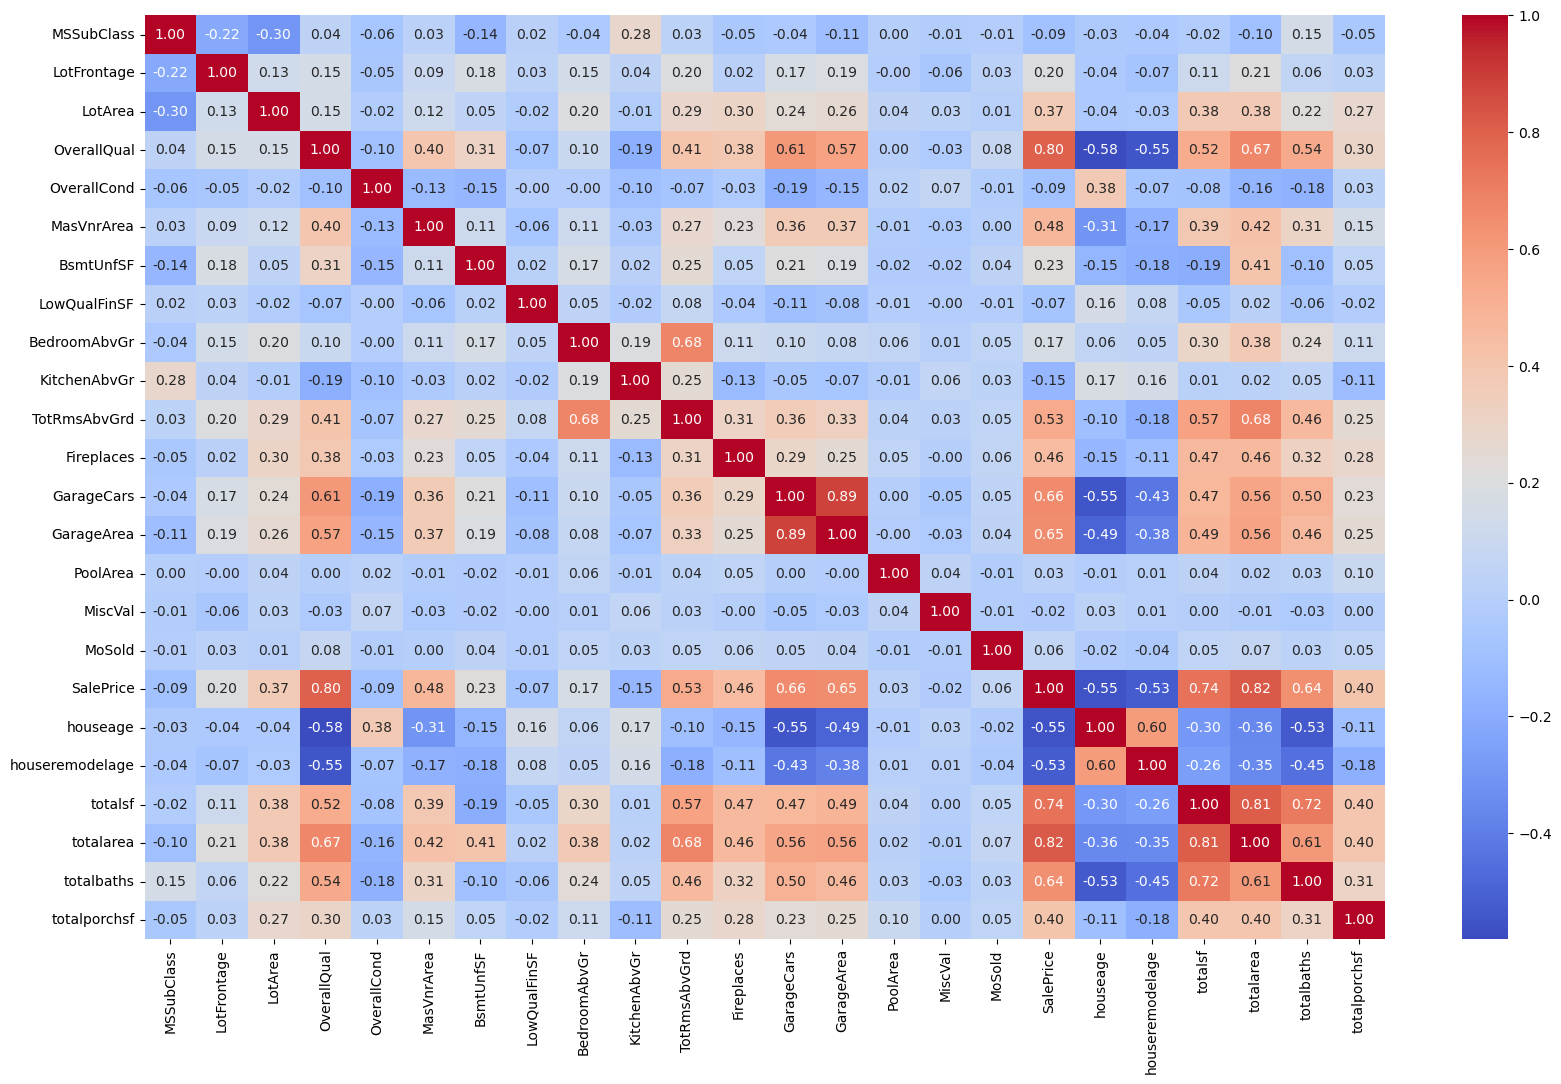

In [80]:
correlation_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [81]:
#drop GarageArea or GarageCars

In [82]:
train_df = train_df.drop(columns=['GarageArea'])
test_df = test_df.drop(columns=['GarageArea'])

<Axes: xlabel='SalePrice', ylabel='Count'>

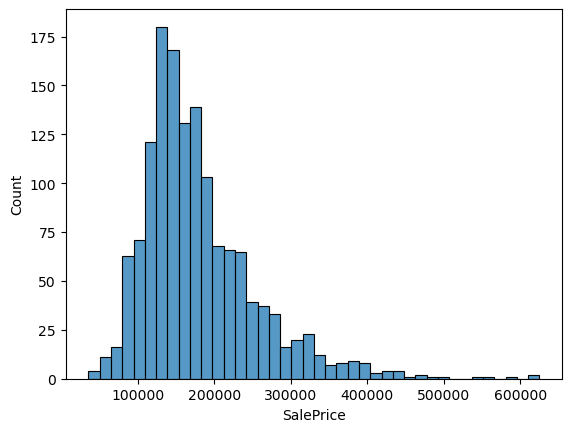

In [83]:
sns.histplot(
    train_df,
    x=train_df['SalePrice']
)

In [84]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
#recover original data //  predicted_sale_price = np.expm1(predicted_log_price)


<Axes: xlabel='SalePrice', ylabel='Count'>

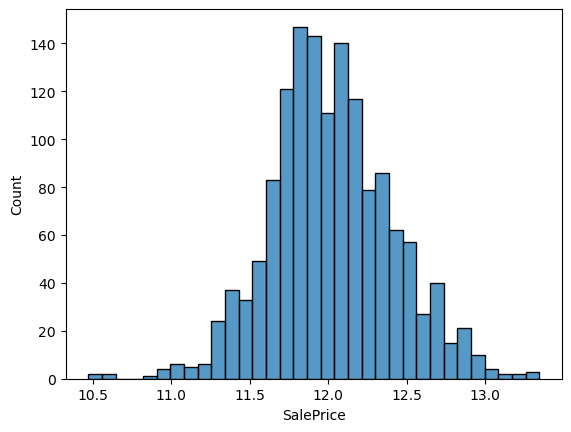

In [85]:
sns.histplot(
    train_df,
    x=train_df['SalePrice']
)

In [86]:
train_df.dtypes[train_df.dtypes=='object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [87]:
train_df.dtypes[train_df.dtypes !='object']

MSSubClass           int64
LotFrontage        float64
LotArea              int64
OverallQual          int64
OverallCond          int64
MasVnrArea         float64
BsmtUnfSF            int64
LowQualFinSF         int64
BedroomAbvGr         int64
KitchenAbvGr         int64
TotRmsAbvGrd         int64
Fireplaces           int64
GarageCars           int64
PoolArea             int64
MiscVal              int64
MoSold               int64
SalePrice          float64
houseage             int64
houseremodelage      int64
totalsf              int64
totalarea            int64
totalbaths         float64
totalporchsf         int64
dtype: object

In [88]:
ode_cols = ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1',  'CentralAir',  'Functional', \
           'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond']
#OrdinalEncoding variables

In [89]:
ohe_cols = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', \
           'MasVnrType','Foundation',  'Electrical',  'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']
#OneHotEncoding variables

In [90]:
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns #
num_cols = num_cols.drop('SalePrice') #dropped target value

In [91]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [92]:
ode_pipeline = Pipeline(steps=[
        ##  Fill missing data with most frequent value
    ('impute', SimpleImputer(strategy='most_frequent')),
 # Convert ordered categorical variables to numeric values, use -1 for unknown categories
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) # 
])

In [93]:
ohe_pipeline = Pipeline(steps=[
    ##  Fill missing data with most frequent value
    ('impute', SimpleImputer(strategy='most_frequent')),
    # Convert unordered categorical data to binary format with one-hot encoding, ignore unknown categories
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [94]:
col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_cols), # Use num_pipeline for numeric data
    ('ode_p', ode_pipeline, ode_cols), # Use ode_pipeline for ordered categorical data
    ('ohe_p', ohe_pipeline, ohe_cols), # Use ohe_pipeline for unordered categorical data
    ],
    remainder='passthrough', # Leave other columns as they are (no action)
    n_jobs=-1) # Perform operations in parallel

In [95]:
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

In [96]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [97]:
X_preprocessed = pipeline.fit_transform(X)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=25)

In [99]:
#build models

In [100]:
lr = LinearRegression()

In [101]:
lr.fit(X_train, y_train)

LinearRegression()

In [102]:
y_pred_lr = lr.predict(X_test)

In [103]:
mean_squared_error(y_test, y_pred_lr)

1.4042531601106654e+17

In [104]:
RFR = RandomForestRegressor(random_state=13)

In [105]:
param_grid_RFR = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 250, 500],
    'min_samples_split': [3, 5, 10]
}

In [106]:
rfr_cv = GridSearchCV(RFR, param_grid_RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [107]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [108]:
np.sqrt(-1 * rfr_cv.best_score_)

0.1339128885727776

In [109]:
rfr_cv.best_params_

{'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 500}

In [110]:
XGB = XGBRegressor(random_state=13)

In [111]:
param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [112]:
xgb_cv = GridSearchCV(XGB, param_grid_XGB, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [113]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=13, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3],
                         'min_child_weight': [1, 2, 3], 'n_estimators': [300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [114]:
np.sqrt(-1 * xgb_cv.best_score_)

0.1192844112453378

In [115]:
ridge = Ridge()

In [116]:
param_grid_ridge = {
    'alpha': [0.05, 0.1, 1, 3, 5, 10],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr']
}


In [117]:
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [118]:
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 1, 3, 5, 10],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr']},
             scoring='neg_mean_squared_error')

In [119]:
np.sqrt(-1 * ridge_cv.best_score_)

0.10908504954341627

In [185]:
GBR = GradientBoostingRegressor()

In [186]:
param_grid_GBR = {
    'max_depth': [12, 15], # Narrower range
    'n_estimators': [200, 300], # Fewer options
    'min_samples_leaf': [10, 25],
    'learning_rate': [0.01, 0.1], # Less learning rate
    'max_features': [0.1, 0.7] # Fewer options
}

In [187]:
GBR_cv = GridSearchCV(GBR, param_grid_GBR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [188]:
GBR_cv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [12, 15],
                         'max_features': [0.1, 0.7],
                         'min_samples_leaf': [10, 25],
                         'n_estimators': [200, 300]},
             scoring='neg_mean_squared_error')

In [189]:
np.sqrt(-1 * GBR_cv.best_score_)


0.11691561642303226

In [190]:
catboost = CatBoostRegressor(loss_function='RMSE', verbose=False)

In [191]:
param_grid_cat ={
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}

In [192]:
cat_cv = GridSearchCV(catboost, param_grid_cat, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [193]:
cat_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x000002A7DE493220>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 10], 'iterations': [100, 200, 300],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5]},
             scoring='neg_mean_squared_error')

In [194]:
np.sqrt(-1 * cat_cv.best_score_)

0.11563469343595632

In [195]:
vr = VotingRegressor([('gbr', GBR_cv.best_estimator_),
                      ('xgb', xgb_cv.best_estimator_),
                      ('ridge', ridge_cv.best_estimator_)],
                    weights=[2,3,1])

In [196]:
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(max_depth=12,
                                                       max_features=0.1,
                                                       min_samples_leaf=25,
                                                       n_estimators=200)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.9, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_t...
                                          interaction_constraints=None,
                                          learning_rate=0.05, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=3,
                                          max_leaves=None, min_child_weight=2,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=300,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=13, ...)),
                            ('ridge', Ridge(alpha=10, solver='lsqr'))],
                weights=[2, 3, 1])

In [197]:
y_pred_vr = vr.predict(X_test)

In [198]:
mean_squared_error(y_test, y_pred_vr, squared=False)

0.11960886801993521

In [199]:
estimators = [
    ('gbr', GBR_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('cat', cat_cv.best_estimator_),
    ('rfr', rfr_cv.best_estimator_),
]

In [200]:
stackreg = StackingRegressor(
            estimators = estimators,
            final_estimator = vr
)

In [201]:
stackreg.fit(X_train, y_train)

StackingRegressor(estimators=[('gbr',
                               GradientBoostingRegressor(max_depth=12,
                                                         max_features=0.1,
                                                         min_samples_leaf=25,
                                                         n_estimators=200)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.9, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature...
                                                                            interaction_constraints=None,
                                                                            learning_rate=0.05,
                                                                            max_bin=None,
                                                                            max_cat_threshold=None,
                                                                            max_cat_to_onehot=None,
                                                                            max_delta_step=None,
                                                                            max_depth=3,
                                                                            max_leaves=None,
                                                                            min_child_weight=2,
                                                                            missing=nan,
                                                                            monotone_constraints=None,
                                                                            multi_strategy=None,
                                                                            n_estimators=300,
                                                                            n_jobs=None,
                                                                            num_parallel_tree=None,
                                                                            random_state=13, ...)),
                                                              ('ridge',
                                                               Ridge(alpha=10,
                                                                     solver='lsqr'))],
                                                  weights=[2, 3, 1]))

In [207]:
y_pred_stack = stackreg.predict(X_test)
print(f"y_pred_stack length: {len(y_pred_stack)}")


y_pred_stack length: 288


In [208]:
mean_squared_error(y_test, y_pred_stack, squared=False)


0.11917505300900044

In [209]:
df_test_preprocess = pipeline.transform(test_df)
print(f"df_test_preprocess length: {len(df_test_preprocess)}")

df_test_preprocess length: 1459


In [210]:
y_stacking = np.exp(stackreg.predict(df_test_preprocess))

df_y_stacking_out = test_df[['Id']].copy()  # Make a copy to avoid the warning
df_y_stacking_out.loc[:, 'SalePrice'] = y_stacking  # Use .loc[] to assign values

df_y_stacking_out.to_csv('submission.csv', index=False)
